In [11]:
import os
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from typing import TypedDict,List
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langchain_groq.chat_models import ChatGroq
from IPython.display import Image,display
load_dotenv()

True

In [6]:
llm = ChatGroq(model="qwen-qwq-32b")
llm.invoke("hi?")

AIMessage(content='\n<think>\nOkay, the user just said "hi?". I need to respond in a friendly way. Let me see... Maybe greet them back and ask how I can help. Keep it simple and open-ended. "Hi there! How can I assist you today?" That sounds good. It\'s welcoming and invites them to state their needs. I should make sure not to use any markdown, just plain text. Yep, that should work.\n</think>\n\nHi there! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 102, 'prompt_tokens': 12, 'total_tokens': 114, 'completion_time': 0.248432421, 'prompt_time': 0.002888638, 'queue_time': 0.24595228, 'total_time': 0.251321059}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'stop', 'logprobs': None}, id='run-53d20bc2-c59f-4308-a370-e3165248afb2-0', usage_metadata={'input_tokens': 12, 'output_tokens': 102, 'total_tokens': 114})

In [7]:
class AgentState(TypedDict):
    messages:List[HumanMessage]

In [9]:
def process_node(state:AgentState) -> AgentState:
    response = llm.invoke(state['messages'])
    print(f"Ai message :: {response.content}")

In [10]:
builder = StateGraph(AgentState)

In [12]:
builder.add_node("process",process_node)
builder.set_entry_point("process")

In [13]:
graph = builder.compile()

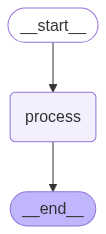

In [14]:
Image(graph.get_graph().draw_mermaid_png())

In [16]:
graph.invoke({"messages":"what is capital of india"})

Ai message :: 
<think>
Okay, the user is asking "what is capital of india". Let me start by recalling that the capital of India is New Delhi. But wait, sometimes people might confuse it with Delhi as a whole, so I should make sure to specify New Delhi.

I should also think about possible variations. Is there any chance the user is referring to something else? Maybe a historical capital? No, the current capital has been New Delhi since it was established in 1911, replacing Kolkata. 

Wait, when was New Delhi officially declared the capital? Let me confirm the timeline. The British Raj moved the capital from Calcutta (Kolkata) to Delhi, and New Delhi was built as the administrative center. It was inaugurated in 1931, but the capital status was formalized then. 

Also, I should check if there's any recent change, but I don't think so. The capital remains New Delhi. 

The user might be a student needing this for a quiz or just general knowledge. They might also appreciate a bit more contex

{'messages': 'what is capital of india'}

In [17]:
user_input = input("Enter user msg :: ")


In [18]:
user_input

'what is capital of india'

In [20]:
graph.invoke({"messages":[HumanMessage(content=user_input)]})

Ai message :: 
<think>
Okay, the user is asking, "What is the capital of India?" Let me start by recalling the basic information. I know that India's capital is New Delhi. Wait, but sometimes people might confuse Delhi with New Delhi. Let me make sure.

First, Delhi is a metropolitan area, and within that, New Delhi is the part that serves as the capital. So the official capital is New Delhi. But maybe I should explain the difference to avoid confusion. 

Let me verify this. India gained independence from British rule in 1947, and New Delhi has been the capital since 1911 when the British announced the shift from Kolkata (then Calcutta). Yes, that's right. So the answer should be New Delhi. 

I should also mention that New Delhi is a part of the larger National Capital Territory (NCT) of Delhi. But the user might just need the straightforward answer. However, providing a bit more context could be helpful. 

Wait, is there any chance that someone might think it's Mumbai or Kolkata? Kolk

{'messages': [HumanMessage(content='what is capital of india', additional_kwargs={}, response_metadata={})]}

In [ ]:
user_input = input("Enter : ")
while user_input not in ['q','exit']:
    graph.invoke({"messages":[HumanMessage(content=user_input)]})
    user_input = input("Enter : ")

Ai message :: 
<think>
Okay, the user just said "hi". I should respond in a friendly way. Let me think of a simple greeting. Maybe "Hello! How can I assist you today?" That sounds good. It's welcoming and opens the conversation for them to ask for help. I should make sure to keep it casual and approachable. Yeah, that should work.
</think>

Hello! How can I assist you today? 😊
Ai message :: 
<think>
Okay, the user asked "who are u". I need to respond appropriately. Let me start by recalling the standard response I have for this question. My name is Qwen, and I'm a large language model developed by Alibaba Cloud. I should mention that I can assist with various tasks like answering questions, writing stories, emails, scripts, and more. I should also highlight my capabilities in logical reasoning and programming. But I should keep it concise and friendly. Let me make sure I don't use any markdown formatting here. Alright, putting it all together now.
</think>

I am Qwen, a large language 